# Jan Suchánek



## Problem 4

In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ipywidgets as widgets 
from ipywidgets import FloatSlider

In [2]:
def optimize(start, end, step, fun):
    start = start
    end = end
    step = step
    fun = fun
    
    #Now I create the Domain of the function we will be working with
    bodiky = []
    i = start
    while i <= end:
        bodiky.append(i)
        i = i + step

    bodiky = [round(num, 10) for num in bodiky] #round because of problems stemming from conversion?? (binary and decimal)
    
    #Here I plug in the Domain to the function, so I get the output values
    output_funkce = []
    for i in bodiky:
        output = fun(i)
        output_funkce.append(output)
        
    #Here I will find the maximum value in the output values
    maximum = output_funkce[0]
    for i in output_funkce:
        if i > maximum: maximum = i
    
    #I create matrix from the Domain and Range of the function - Domain values correspond to Range values
    matice = pd.DataFrame({
        "Domain": bodiky,
        "Range": output_funkce
    })
    
    
    '''Now i will filter the dataframe and keep only those points, which satisfy the maximum condition. Usually, there should
    be only one point, but there could be multiple (for example when taking cosine function with step being some multiple or
    fraction of pi).'''
    maxima = matice[matice['Range'] == maximum].reset_index().drop('index', 1) #resets index, drops old index column
    return maxima

Now that we defined the function, it comes time to test it. I will try cosine function and $x^2$ function.

In [3]:
print(optimize(-1,1,0.1, lambda x: math.cos(x)))
print(optimize(-1,1,0.1, lambda x: x**2-1))

   Domain  Range
0    -0.0    1.0
   Domain  Range
0    -1.0    0.0
1     1.0    0.0


It seems that the function works as intended. Even for $x^2$ it takes into account that there are two maximum points on the chosen Domain and returns both of them, as I intended.

I would just like to comment that I really enjoyed this exercise on basics with python. It would be nice if similar exercises were in following homework(s) in order for us to get as familiar with python as possible.

## Problem 5

I will start by loading the data:

In [4]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
death = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

display(
    confirmed.shape,
    confirmed.head(),
    )
display(
    death.shape,
    death.head(),
    )
display(
    recovered.shape,
    recovered.head(),
    )

(266, 260)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370


(266, 260)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,370,373,375,377,380,384,387,388,389,392
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,162,167,171,174,176,179,183,185,189,193


(253, 260)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32619,32619,32635,32642,32642,32746,32789,32842,32842,32842
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7239,7309,7397,7397,7629,7732,7847,8077,8342,8536
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,35544,35654,35756,35860,35962,36063,36174,36282,36385,36482
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1203,1263,1263,1263,1265,1265,1432,1432,1540,1540
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1503,1554,1639,1707,1813,1833,1941,2082,2215,2436


After brief inspection of data contained in covid file, I now know that datasets for confirmed cases and deaths look very much the same. It seems that dataset for numbers of recovered patients is missing several countries. I choose Finland for closer inspection. I begin by subsetting data for Finland from each dataset and applying the simplest kind of plot.

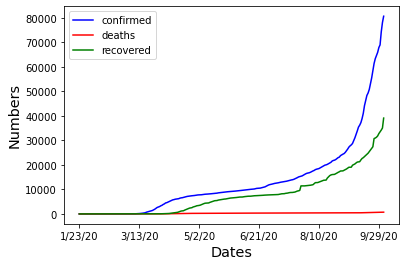

In [21]:
country = 'Czechia'
taic = confirmed.loc[confirmed["Country/Region"] == country]
taid = death.loc[death["Country/Region"] == country]
tair = recovered.loc[recovered["Country/Region"] == country]
taic.iloc[0][5:266].plot(color = "blue", label = "confirmed")
taid.iloc[0][5:266].plot(color = "red", label = "deaths")
tair.iloc[0][5:266].plot(color = "green", label = "recovered")
plt.legend()
plt.ylabel('Numbers', size='x-large')
plt.xlabel('Dates', size='x-large')
plt.show()

Plot seems to reflect reality - numbers seem realistic, also all three functions are supposed to be cumulative, therefore they are non-decreasing. Although there seems to be a small shift downwards around first half of May, it does not look significant. Gap between confirmed and recovered + deaths at any given point in time is equal to number of sick patients at that point.

In [22]:
data = pd.DataFrame(taic.append(tair).append(taid)) #data for Finland from all three datasets are combined here into single dataset
data.shape
data = data.iloc[0:4,4:260] #columns containing useless information are removed
data.index = ['confirmed','recovered','deaths'] #row indexes changed - previous indexing referred to indexing in csv files
data = data.transpose() #I transpose the matrix so that it looks the way we work with dataframes
data #lets check the data

,confirmed,recovered,deaths
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/29/20,67843,32759,636
9/30/20,68919,33443,655
10/1/20,74255,34186,678
10/2/20,78051,35032,699


Point of interest is number of infected at any given point in time, because sick patients are the ones who can infect someone else. But recent information suggest that recovered patients might not be fully immune to covid-19. In addition, they might continue to transmit the disease after recovery, with length of time period of being infectious after recovery depending on severity of the case. On the other hand, the data we use lack more detailed information, thus I will omitt these drawbacks and assume, that only infected persons are able to transmit the disease further.
Therefore I will create variable, which will stand for number of infected at any given point in time. This variable will be equal to number of deaths and recoveries substracted from number of confirmed cases.

C:\Users\jsuch\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

,date,confirmed,recovered,deaths,infected,log_inf,time
0,3/1/20,3,0,0,3,1.098612,0
1,3/2/20,3,0,0,3,1.098612,1
2,3/3/20,5,0,0,5,1.609438,2
3,3/4/20,8,0,0,8,2.079442,3
4,3/5/20,12,0,0,12,2.484907,4
...,...,...,...,...,...,...,...
212,9/29/20,67843,32759,636,34448,10.447206,212
213,9/30/20,68919,33443,655,34821,10.457976,213
214,10/1/20,74255,34186,678,39391,10.581293,214
215,10/2/20,78051,35032,699,42320,10.653015,215


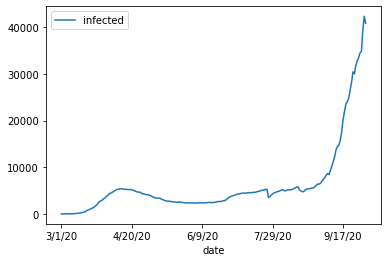

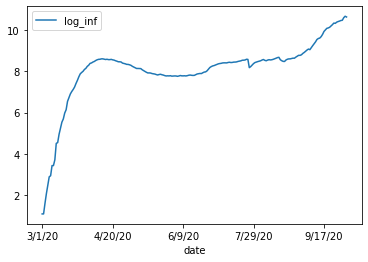

In [23]:
inf = data["confirmed"] - data["recovered"] - data["deaths"] #the variable
#data = data.assign(infected = inf)
data = data.assign(infected = inf) #assignment to dataset
data = data.loc[data['infected'] > 0] # days with zero infection do not interest as because of initial condition of Malthusian population model
data = data.assign(log_inf = np.log(inf)) #assignment of logarithm of infected - explained later
data = data.assign(time = range(data.shape[0])) #time variable assigned
data = data.reset_index().rename(columns = {"index":"date"}) #dates stop being row indexes - transformed to variable
# I will plot both infected variable and its log with date
display(
    data.plot("date", "infected"),
    data.plot("date", "log_inf") 
    )
data #check the table in order to know whether everything worked

## Malthusian Model

In [24]:
t = sp.Symbol('t')  # time
I = sp.Function('I') # number of infected persons
r = sp.Symbol('r')  # reproduction number - point of interest
I0 = sp.Symbol('I0') # initial number of infected persons

diff_malth = sp.Eq(I(t).diff(), r*I(t)) # Malthusian population model

diff_sol = sp.dsolve(diff_malth, I(t)) #solution of the differential equation

#Initial condition needs to be added - how many infected existed in the beginning
diff_sol = diff_sol.subs('C1', I0) #replaces C1 with I0, then I have number of infected in the beginning: I(0)=I0
diff_sol

Eq(I(t), I0*exp(r*t))

Since I intent to use linear regression, I need to apply log function on the equation, then coefficient of explanatory variable obtained by the regression will correspond to the reproduction number. Firstly, a function is needed which will solve both sides of the differential equation (I admit, I stole this function from seminar, because I am not able to write anything as remotely functional as this).

In [25]:
def splog(x):
    x = sp.expand_log( #this expands logarithmized expression, if possible
        sp.log(x), #this chunk logarithmizes the expression
        force = True
    )
    return x

In [26]:
print(diff_sol.lhs)

I(t)


In [27]:
diff_final = sp.Eq(
    splog(diff_sol.lhs), #left-hand side of the equation
    splog(diff_sol.rhs), #right-hand side of the equation
    )
diff_final

Eq(log(I(t)), r*t + log(I0))

Below can be seen my results for Finland:

In [28]:
olsfit = smf.ols('log_inf ~ time', data = data).fit() #run the regression
print(olsfit.summary())
hodnota_r = olsfit.params[1].round(4)
print("The estimated value of " + str(r) + " rounded to 4 decimal numbers:    " + str(hodnota_r))

                            OLS Regression Results                            
Dep. Variable:                log_inf   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     202.8
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           7.44e-33
Time:                        14:32:04   Log-Likelihood:                -331.21
No. Observations:                 217   AIC:                             666.4
Df Residuals:                     215   BIC:                             673.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2020      0.151     40.981      0.0

The regression does not seem fine. Results by Jarque-Bera and and by Durbin-Watson tests imply bad error terms and last plot illustrates strong heteroskedasticity. Overall model performs quite bad. It seems, that from econometrics point of view, OLS estimator is not ideal in this case at all or at least more variables should be accounted into the model. In terms of Malthusian population model, received estimate of reproduction number is not very reliable.

Now I will plot residual and fitted values to illustrate the heteroskedasticity:

Text(0.5, 1.0, 'Residuals vs fitted values')

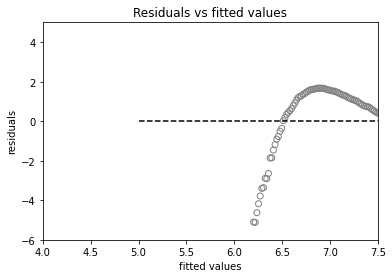

In [29]:
plt.scatter(olsfit.fittedvalues, olsfit.resid, facecolors = 'none', edgecolors = 'grey')
plt.hlines(0, 5, 12, color = 'black', linestyles = 'dashed')
plt.ylim(-6,+5)
plt.xlim(4,7.5)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('Residuals vs fitted values')

Now I will plot actual and fitted values to further illustrate problematics of this model:

Text(0.5, 1.0, 'Explained variable and its fitted values')

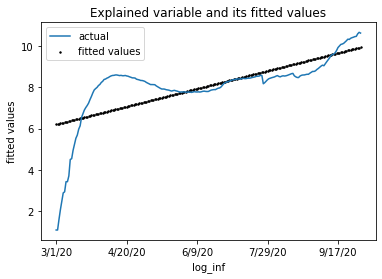

In [30]:
data.plot('date', 'log_inf', label = 'actual')
plt.scatter(data.date, olsfit.fittedvalues, s = 2, color = 'black', label = 'fitted values')
plt.legend()
plt.ylabel('fitted values')
plt.xlabel('log_inf')
plt.title('Explained variable and its fitted values')

## Interactive Plot

In [31]:
def float_slider(val, min, max, step):
    return FloatSlider(value = val, min = min, max = max, step = step, continuous_update = False)

In [32]:
def update(data_min, data_max):
    global data
    data = data
    if data_min >= data_max:
        plt.plot()
        plt.title("Starting date needs to be stricly lower than final date!")
        return()
    
    data_subset = data.loc[data.time.between(data_min, data_max, inclusive = True)]
    olsfit = smf.ols('log_inf ~ time', data = data_subset).fit()
    data_subset.plot('date', 'log_inf', label = 'actual')
    plt.xticks(rotation = 40)
    plt.scatter(data_subset.date, olsfit.fittedvalues, s = 2, color = 'black', label = 'fitted values')
    plt.legend()
    plt.title('Explained variable and its fitted values')
    
    print("The formula    : log(I_t)=" + str(olsfit.params[0].round(3)) + " + "+ str(olsfit.params[1].round(3)) + "*t")
    print("R_squared      : "  + str(olsfit.rsquared.round(3)))
    print("R0             : "  + str(np.exp(olsfit.params.iloc[1]).round(3)))

In [33]:
widgets.interact(update,
                 data_min = float_slider(0, 0, data.shape[0]-10, 1),
                 data_max = float_slider(data.shape[0], 10, data.shape[0], 1)
                 )

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='data_min', max=207.0, step=…

<function __main__.update(data_min, data_max)>

Although it seems that Malthusian population model does not describe well the growth of population of sick people in general, it can be seen that there are time intervals long up to two months, in  which the model fits the data pretty well with quite high $R^2$ and low heteroskedasticity.